In [ ]:
https://forum.numer.ai/t/numerai-model-survey-results/1090
https://www.kaggle.com/code1110/numerai-tournament
https://colab.research.google.com/drive/1-FOJRUeDEhxrixPBnKRAlxbMboiKWjT6
https://towardsdatascience.com/modeling-price-with-regularized-linear-model-xgboost-55e59eae4482
#http://www.philipkalinda.com/ds3.html
#https://www.kaggle.com/rahulharlalka/iris-species-classification-100-accuracy
#https://colab.research.google.com/github/parmarsuraj99/numerai-guides/blob/master/better_evaluation/Numerai_evaluate_better.ipynb
#https://medium.com/@parmarsuraj99/evaluating-financial-machine-learning-models-on-numerai-3562da8fd90
#https://colab.research.google.com/drive/1W4XNv9vwsMLnoKPgWti8JzHrXhE1-YjK#scrollTo=tCdoumbycX_k
#https://towardsdatascience.com/a-guide-to-the-hardest-data-science-tournament-on-the-planet-748f46e83690
#https://hackernoon.com/numerai-walkthrough-quantitative-analysis-machine-learning-for-fun-and-profit-3dcdccabd920
#https://medium.com/@chris_whirlwind/numerai-tutorial-i-vanilla-algorithms-and-adversarial-validation-183b44e98f15
#https://colab.research.google.com/drive/1un9sQF5063VQ1UH13elYM269ZeYxHKFw?usp=sharing#scrollTo=yGCEWaizehA9
#https://towardsdatascience.com/a-guide-to-the-hardest-data-science-tournament-on-the-planet-748f46e83690
#https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
#https://github.com/Jeremy123W/Numerai/tree/master/scripts
#https://machinelearningmastery.com/bagging-ensemble-with-python/
#https://scikit-learn.org/stable/modules/ensemble.html
#https://github.com/sarajcev/numerai/blob/master/tsne.py
#https://github.com/sarajcev/numerai/blob/master/numerai.py

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Nov 25 19:41:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
pip install numerapi

In [ ]:
'''
##################### LIBRARIES ##################################
'''
import pandas as pd
import scipy
import numpy as np
import numerapi
import random
import sklearn
from sklearn import (
    feature_extraction, feature_selection, decomposition, linear_model,
    model_selection, metrics, svm, preprocessing, utils
)
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OrdinalEncoder, LabelEncoder,OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential, model_from_json, load_model
from keras.layers import Dense, Dropout, Activation,LSTM,Bidirectional, MaxPooling2D, Flatten,GRU
from keras.optimizers import SGD,Adam
from keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold, GroupKFold, GridSearchCV,cross_val_score,KFold, RepeatedStratifiedKFold,train_test_split
from sklearn.metrics import log_loss, make_scorer, mean_squared_error,classification_report,accuracy_score
from keras.layers.normalization import BatchNormalization
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import tensorflow as tf
from keras.utils import np_utils 
from sklearn import preprocessing
from keras.wrappers.scikit_learn import KerasClassifier
from xgboost import XGBRegressor 
from sklearn.cluster import KMeans
import xgboost as xgb
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC as svc
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
seed = 3
rand = np.random.seed(seed)

TOURNAMENT_NAME = "nomi"
TARGET_NAME = f"target_{TOURNAMENT_NAME}"
PREDICTION_NAME = f"prediction_{TOURNAMENT_NAME}"


#MODEL_FILE = tf.keras.models.load_model('numeraiMLP338.h5')


In [ ]:
'''
##################### CLASSES AND FUNCTIONS ##################################
'''

class Download():
    
    def training(self):
        import pandas as pd
        df_training = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_training_data.csv.xz")
        return df_training
    
    def tournament(self):
        import pandas as pd
        df_tournament = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_tournament_data.csv.xz")
        return df_tournament
    
class Submission():

    def make_submission(self,df_tournament_data):
        
        print("Generating Public_ID and Model_ID...")
        # Get your API keys and model_id from https://numer.ai/submit
        public_id = "7TISUDGAWEVO2B35ECOQQXU2RWXGZN3I"
        secret_key = "QJYUWIMFEEDNZ4GHUO6VSSKPMRCBFJIMJ7BZ65ESIWRN4YHGYHSRJDNL64TAG7EH"
        model_id = "d49c26a4-aa5b-4490-9d58-300c5e05d996"
        napi = numerapi.NumerAPI(public_id=public_id, secret_key=secret_key)
        print("Generated!")
        
        print("Generating DataFrame to submission...")
        predictions_df = df_tournament_data["id"].to_frame()
        predictions_df["prediction"] = df_tournament_data[PREDICTION_NAME]
        print("Generated!")
        
        print("Uploading DataFrame in Numerai...")
        # Upload your predictions
        predictions_df.to_csv("predictions.csv", index=False)
        submission_id = napi.upload_predictions("predictions.csv", model_id=model_id)
        print("DataFrame Uploaded...")
        
        return predictions_df

class Stats():

    def statics(df_tournament_data):
        
        """Validation Metrics"""
        # Check the per-era correlations on the validation set (out of sample)
        validation_data = df_tournament_data[df_tournament_data.data_type == "validation"]
        validation_correlations = validation_data.groupby("era").apply(score)
        
        validation_sharpe = validation_correlations.mean() / validation_correlations.std()
        
        return validation_sharpe
            
    def correlation(self,predictions, targets):
        ranked_preds = predictions.rank(pct=True, method="first")
        return np.corrcoef(ranked_preds, targets)[0, 1]

    def score(self,df):
        return Stats.correlation(df[PREDICTION_NAME], df[TARGET_NAME])

    def payout(self,scores):
        return scores.clip(lower=-0.25, upper=0.25)
        
        
def graph_importance(model):
    import xgboost as xgb
    fig, ax = plt.pyplot.subplots(1,1,figsize=(10,10))
    xgb.plot_importance(model, max_num_features=30, ax=ax)

def graph_grafo(model):        
    xgb.to_graphviz(model, num_trees=1)
    
def Cluster_Eras(df):

    X_clusters_eras = df
    eras = [e for e in X_clusters_eras.era.unique()]
    X_clusters_eras['eras_cluster'] = X_clusters_eras.era.str.slice(3).astype(int)    
    return X_clusters_eras

def Cluster_Kmeans(df,X,clusters):
    
    print('Call algorithm K-means')
    kmeans = KMeans(n_clusters=clusters, random_state=rand, init = 'random')
    print('Fitting algorithm K-means')
    kmeans.fit(X)
    print('Finished and Fitted')
    X_clusters_kmeans = df
    X_clusters_kmeans['k-means'] = kmeans.labels_
    return X_clusters_kmeans

def KMeans_Clustering_XGBRegressor(df,group,features):
    
    df_features_X = group[features]
    df_features_X['target'] = group.target
    X = df_features_X[df_features_X.columns[0:-1]]
    Y = df_features_X[df_features_X.columns[-1]]
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20,random_state=rand)

    model = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=2000, colsample_bytree=0.1, verbosity=1, nthread=6)
    model.fit(x_train, y_train)

    return model, x_train,x_test,y_train,y_test

def my_loss_fn(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

def pearson_cumsom_loss(y_true, y_pred):
    '''
    optmize negative pearson coefficient loss
    :param y_true:
    :param y_pred:
    :return:
    '''
    if isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.Series):
        y_pred = y_pred.values
    n = len(y_true)
    y_bar = y_true.mean()
    yhat_bar = y_pred.mean()
    c = 1 / ((y_true - y_bar) ** 2).sum().sqrt()  # constant variable
    b = ((y_pred - yhat_bar) ** 2).sum().sqrt()  # std of pred

    a_i = y_true - y_bar
    d_i = y_pred - yhat_bar
    a = (a_i * d_i).sum()
    gradient = c * (a_i / b - a * d_i / b**3)
    hessian = - (np.matmul(a_i.reshape(-1, 1), d_i.reshape(1, -1)) + np.matmul(d_i.reshape(-1, 1), a_i.reshape(1, -1))) / b ** 3 + \
              3 * a * np.matmul(d_i.reshape(-1, 1), d_i.reshape(1, -1)) / b**5 + a/(n*b**3)
    hessian = hessian - np.ones(shape=(n, n)) * a/b**3
    hessian *= c
    return -gradient, -hessian

In [ ]:
dw = Download()
sub = Submission()
st = Stats()

In [ ]:
'''
##################### BEGIN LOGIC OF THE MODEL ##################################
'''

'\n##################### BEGIN LOGIC OF THE MODEL ##################################\n'

In [ ]:
'''
##############################################################################
########################## DOWLOAD DATA ######################################
##############################################################################
'''
napi = numerapi.NumerAPI(verbosity="info")

if napi.check_new_round():
    print("new round has started within the last 24hours!")
else:
    print("no new round within the last 24 hours")

print("Loading data...")
training_data = dw.training()
tournament_data = dw.tournament()
print("Data downloaded...")


new round has started within the last 24hours!
Loading data...
Data downloaded...


In [ ]:
'''
##############################################################################
########################  DIVIDE DATA  in X and Y  ###########################
##############################################################################
'''
#model = MODEL_FILE

#validation_data = tournament_data[tournament_data.data_type=='validation']
#complete_training_data = pd.concat([training_data, validation_data])

complete_training_data = training_data
feature_cols = training_data.columns[training_data.columns.str.startswith('feature')]
print(f"Loaded {len(feature_cols)} features")

df_features = complete_training_data[feature_cols]
df_features[TARGET_NAME] = complete_training_data['target'].values

# NORAML DATA

X = df_features[df_features.columns[0:-1]]
Y = df_features[df_features.columns[-1]]

# ENCODER Y 2 TYPES

le = LabelEncoder()
Y_enc = le.fit_transform(Y)
dummy_y = np_utils.to_categorical(Y_enc)
df_dummy_y = pd.DataFrame(dummy_y)

#PCA WITHOUT SCALER

pca2 = PCA(n_components=125, random_state=rand)
pca_2 = pca2.fit_transform(training_data[feature_cols])
df_zero = pd.DataFrame(pca_2, columns=[feature_cols[0:125]])
X_zero = df_zero

# SCALED DATA

df_x = training_data[feature_cols]
ss = StandardScaler()
df_x[feature_cols] = ss.fit_transform(df_x[feature_cols])
X_x = df_x

# PCA WITH SCALED DATA

df_z = df_x
pca2 = PCA(n_components=125, random_state=rand)
pca_2 = pca2.fit_transform(df_z)
df_z = pd.DataFrame(pca_2, columns=[feature_cols[0:125]])
X_z = df_z



Loaded 310 features


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [ ]:
'''
##################### BEGINNING OF THE MODEL ##################################
'''

In [ ]:
'''
##############################################################################
###########################  MODEL ONE  ######################################
##############################################################################
'''

In [ ]:
X_clusters_kmeans = Cluster_Kmeans(training_data, X, 10)
X_zero_clusters_kmeans  = Cluster_Kmeans(training_data, X_zero, 10)
X_x_clusters_kmeans = Cluster_Kmeans(training_data, X_x, 10)
X_z_clusters_kmeans = Cluster_Kmeans(training_data, X_z, 10)

Call algorithm K-means
Fitting algorithm K-means
Finished and Fitted
Call algorithm K-means
Fitting algorithm K-means
Finished and Fitted
Call algorithm K-means
Fitting algorithm K-means
Finished and Fitted
Call algorithm K-means
Fitting algorithm K-means
Finished and Fitted


In [ ]:
df = pd.DataFrame()
df['X_clusters_kmeans'] = X_clusters_kmeans['k-means']
df['X_zero_clusters_kmeans'] = X_zero_clusters_kmeans['k-means']
df['X_x_clusters_kmeans'] = X_x_clusters_kmeans['k-means']
df['X_z_clusters_kmeans'] = X_z_clusters_kmeans['k-means']

In [ ]:
X_group_1 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 0]
X_group_2 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 1]
X_group_3 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 2]
X_group_4 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 3]
X_group_5 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 4]
X_group_6 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 5]
X_group_7 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 6]
X_group_8 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 7]
X_group_9 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 8]
X_group_10 = X_clusters_kmeans.loc[X_clusters_kmeans['k-means'] == 9]

In [ ]:
########################## SEGMENTATION OF DATA  ##############################

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.20,random_state=rand)

In [ ]:
########################## MODEL XGBREGRESSOR  ##############################

In [ ]:
model_init = XGBRegressor(max_depth=10, learning_rate=0.01, n_estimators=2000, colsample_bytree=0.1, nthread=15)
model_init.fit(x_train, y_train)

In [ ]:
first_prediction = model_init.predict(x_test)
first_prediction = pd.DataFrame(first_prediction)

In [ ]:
first_prediction

In [ ]:
########################## MODEL LINEAR REGRESSION  ############################

In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)

In [ ]:
second_prediction = model.predict(x_test)
second_prediction = pd.DataFrame(second_prediction)

In [ ]:
second_prediction

In [ ]:
########################## MODEL KERAS ######################################

In [ ]:

input_data = tf.keras.Input(shape=(len(feature_cols),))

x = tf.keras.layers.Dense(len(feature_cols), activation='relu')(input_data)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(len(feature_cols) // 2, activation='relu')(x)
x = tf.keras.layers.Dense(len(feature_cols) // 4, activation='relu')(x)

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

optimizer = tf.keras.optimizers.Adam( learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")

model = tf.keras.Model(input_data, output)

model.compile(optimizer=optimizer, loss=my_loss_fn, metrics=['mae', 'mse'])

In [ ]:
epochs=50
batch_size = len(training_data) // 1000 * 3

In [ ]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/50
268/268 [==============================] - 4s 15ms/step - loss: 0.2999 - mae: 0.5000 - mse: 0.2999 - val_loss: 0.2998 - val_mae: 0.4999 - val_mse: 0.2998
Epoch 2/50
268/268 [==============================] - 4s 13ms/step - loss: 0.2999 - mae: 0.5000 - mse: 0.2999 - val_loss: 0.2998 - val_mae: 0.4999 - val_mse: 0.2998
Epoch 3/50
268/268 [==============================] - 4s 13ms/step - loss: 0.2999 - mae: 0.5000 - mse: 0.2999 - val_loss: 0.2998 - val_mae: 0.4999 - val_mse: 0.2998
Epoch 4/50
268/268 [==============================] - 4s 13ms/step - loss: 0.2999 - mae: 0.5000 - mse: 0.2999 - val_loss: 0.2998 - val_mae: 0.4999 - val_mse: 0.2998
Epoch 5/50
268/268 [==============================] - 4s 13ms/step - loss: 0.2999 - mae: 0.5000 - mse: 0.2999 - val_loss: 0.2998 - val_mae: 0.4999 - val_mse: 0.2998
Epoch 6/50
268/268 [==============================] - 3s 12ms/step - loss: 0.2999 - mae: 0.5000 - mse: 0.2999 - val_loss: 0.2998 - val_mae: 0.4999 - val_mse: 0.2998
Epoch 7/50

In [ ]:
third_prediction = model.predict(x_test)
third_prediction = pd.DataFrame(third_prediction)
third_prediction

scores = model.evaluate(x_test, y_test, verbose=1)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

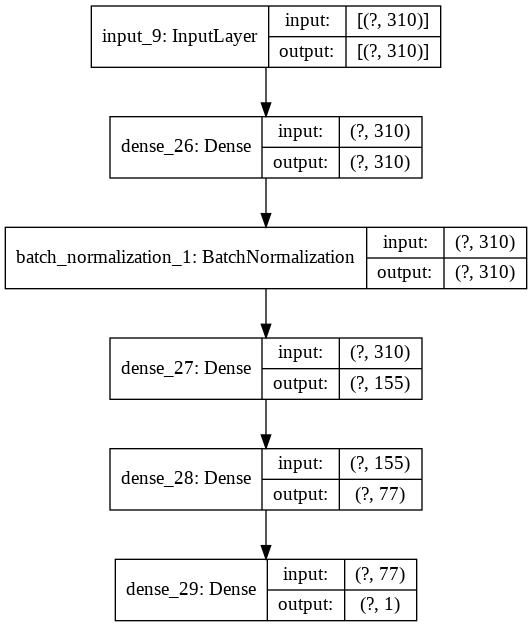

In [ ]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [ ]:
'''
##############################################################################
###########################  MODEL TWO  ######################################
##############################################################################
'''

In [ ]:
import numerapi
import torch
from torch.nn import Linear
from torch.nn import Sequential
from torch.functional import F

In [ ]:
def exposures(x, y):
    x = x - x.mean(dim=0)
    x = x / x.norm(dim=0)
    y = y - y.mean(dim=0)
    y = y / y.norm(dim=0)
    return torch.matmul(x.T, y)

def reduce_exposure(prediction, features, max_exp):
    # linear model of features that will be used to partially neutralize predictions
    lin = Linear(features.shape[1],  1, bias=False)
    lin.weight.data.fill_(0.)
    model = Sequential(lin)
    optimizer = torch.optim.Adamax(model.parameters(), lr=1e-4)
    feats = torch.tensor(np.float32(features)-.5)
    pred = torch.tensor(np.float32(prediction))
    start_exp = exposures(feats, pred[:,None])
    # set target exposure for each feature to be <= current exposure
    # if current exposure is less than max_exp, or <= max_exp if  
    # current exposure is > max_exp
    targ_exp = torch.clamp(start_exp, -max_exp, max_exp)

    for i in range(100000):
        optimizer.zero_grad()
        # calculate feature exposures of current linear neutralization
        exps = exposures(feats, pred[:,None]-model(feats))
        # loss is positive when any exposures exceed their target
        loss = (F.relu(F.relu(exps)-F.relu(targ_exp)) + F.relu(F.relu(-exps)-F.relu(-targ_exp))).sum()
        print(f'       loss: {loss:0.7f}', end='\r')
        if loss < 1e-7:
            neutralizer = [p.detach().numpy() for p in model.parameters()]
            neutralized_pred = pred[:,None]-model(feats)
            break
        loss.backward()
        optimizer.step()
    return neutralized_pred, neutralizer

def reduce_all_exposures(df, column, neutralizers=[],
                                     normalize=True,
                                     gaussianize=True,
                                     era_col="era",
                                     max_exp=0.1):
    unique_eras = df[era_col].unique()
    computed = []
    for u in unique_eras:
        print(u, '\r')
        df_era = df[df[era_col] == u]
        scores = df_era[column].values
        exposure_values = df_era[neutralizers].values
        
        if normalize:
            scores2 = []
            for x in scores.T:
                x = (scipy.stats.rankdata(x, method='ordinal') - .5) / len(x)
                if gaussianize:
                    x = scipy.stats.norm.ppf(x)
                scores2.append(x)
            scores = np.array(scores2)[0]

        scores, neut = reduce_exposure(scores, exposure_values, max_exp)

        scores /= scores.std()

        computed.append(scores.detach().numpy())

    return pd.DataFrame(np.concatenate(computed), columns=column, index=df.index)


In [ ]:
tournament_data[PREDICTION_NAME] = model.predict(tournament_data[feature_cols])

In [ ]:
tournament_data[PREDICTION_NAME]

0          0.517109
1          0.478546
2          0.755702
3          0.467026
4          0.471664
             ...   
1591506    0.658450
1591507    0.484364
1591508    0.479514
1591509    0.433529
1591510    0.609586
Name: prediction_nomi, Length: 1591511, dtype: float32

In [ ]:
data_rfe_10 = reduce_all_exposures(tournament_data,
                                   [PREDICTION_NAME],
                                   neutralizers=feature_cols,
                                   era_col="era",
                                   max_exp=0.10)

In [ ]:
# replace prediction with reduced feature exposure prediction and rescale to [0,1]
tournament_data[PREDICTION_NAME] = data_rfe_10[PREDICTION_NAME]
tournament_data[PREDICTION_NAME] -= tournament_data[PREDICTION_NAME].min()
tournament_data[PREDICTION_NAME] /= tournament_data[PREDICTION_NAME].max()

2020-11-28 20:38:38,809 INFO numexpr.utils: Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-11-28 20:38:38,810 INFO numexpr.utils: NumExpr defaulting to 8 threads.


In [ ]:
tournament_data[PREDICTION_NAME]

0          0.536490
1          0.478624
2          0.724807
3          0.460972
4          0.467606
             ...   
1591506    0.669140
1591507    0.489414
1591508    0.483073
1591509    0.425202
1591510    0.631498
Name: prediction_nomi, Length: 1591511, dtype: float64

In [ ]:
'''
##############################################################################
######################## MAKE PREDICTIONS ####################################
##############################################################################
'''
print("Generating predictions...")
    
torunament_features = tournament_data[feature_cols]
enc_Y_tournament = model.predict(torunament_features)
df_enc_Y_tournament = pd.DataFrame(enc_Y_tournament)

#dec_Y_tournament = df_enc_Y_tournament.idxmax(axis=1)

#Y_tournament = le.inverse_transform(df_enc_Y_tournament)

tournament_data[PREDICTION_NAME] = df_enc_Y_tournament

print("Predictions Generated...")


Generating predictions...
Predictions Generated...


In [ ]:
'''
##############################################################################
############################  STATICS  #######################################
##############################################################################
'''
value  = st.statics(tournament_data)

In [ ]:
'''
##############################################################################
######################### MAKE SUBMISSION #################################### 
##############################################################################
'''
final_df = sub.make_submission(tournament_data[PREDICTION_NAME])

Generating Public_ID and Model_ID...
Generated!
Generating DataFrame to submission...


KeyError: ignored

In [ ]:
print("Generating Public_ID and Model_ID...")
# Get your API keys and model_id from https://numer.ai/submit
public_id = "7TISUDGAWEVO2B35ECOQQXU2RWXGZN3I"
secret_key = "QJYUWIMFEEDNZ4GHUO6VSSKPMRCBFJIMJ7BZ65ESIWRN4YHGYHSRJDNL64TAG7EH"
model_id = "d49c26a4-aa5b-4490-9d58-300c5e05d996"
napi = numerapi.NumerAPI(public_id=public_id, secret_key=secret_key)
print("Generated!")

print("Generating DataFrame to submission...")
predictions_df = tournament_data["id"].to_frame()
predictions_df["prediction"] = tournament_data[PREDICTION_NAME]
print("Generated!")

print("Uploading DataFrame in Numerai...")
# Upload your predictions
predictions_df.to_csv("predictions.csv", index=False)
submission_id = napi.upload_predictions("predictions.csv", model_id=model_id)
print("DataFrame Uploaded...")

Generating Public_ID and Model_ID...
Generated!
Generating DataFrame to submission...
Generated!
Uploading DataFrame in Numerai...


2020-11-28 20:39:05,192 INFO numerapi.base_api: uploading predictions...


DataFrame Uploaded...


In [ ]:
'''
##############################################################################
########################  SAVE AND LOAD THE MODEL  ###########################
##############################################################################
'''
# SAVE MODEL
model.save_weights('numeraiThe_Model.h5', overwrite=True, save_format=None, options=None)

In [ ]:
# LOAD MODEL
model.load_weights('numeraiThe_Model.h5', by_name=False, skip_mismatch=False, options=None)